In [7]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sb


from steves_utils.summary_utils import (
    get_experiments_from_path
)

from steves_utils.utils_v2 import (
    get_experiments_base_path
)

In [2]:
experiments_to_get = [
    "oracle.run2",
#     "oracle.run1",
#     "cores",
#     "metehan",
#     "wisig",
#     "oracle.run1.framed",
#     "oracle.run2.framed",
]

experiments = {}

for experiment in experiments_to_get:
    experiments[experiment] = get_experiments_from_path(
        os.path.join(get_experiments_base_path(), "tmp", experiment)
    )

In [3]:
all_trials = pd.DataFrame(columns=[
    "experiment_name",
    "source_val_label_accuracy",
    "target_val_label_accuracy",
    "x_transforms_source"
])

for experiment in experiments_to_get:   
    for trial in experiments[experiment]:
        f = pd.DataFrame(trial["results"])
        f["experiment_name"] = experiment
        f["x_transforms_source"] =  str(trial["parameters"]["x_transforms_source"])
        f = f[all_trials.columns]
        
        f = f.iloc[0] # Unknown why, but pandas is repeating trials for each domain in the trial!
        
        
        all_trials = all_trials.append(f)
    
all_trials = all_trials.reset_index(drop=True)
all_trials

,experiment_name,source_val_label_accuracy,target_val_label_accuracy,x_transforms_source
0,oracle.run2,0.793229,0.647708,[]
1,oracle.run2,0.553993,0.450625,['unit_power']
2,oracle.run2,0.062500,0.062500,['times_zero']
3,oracle.run2,0.543924,0.446667,['unit_mag']


In [22]:
m = pd.melt(all_trials, 
        id_vars=["experiment_name", "x_transforms_source"], 
        value_vars=[
            "source_val_label_accuracy",
            "target_val_label_accuracy",
        ])
m

,experiment_name,x_transforms_source,variable,value
0,oracle.run2,[],source_val_label_accuracy,0.793229
1,oracle.run2,['unit_power'],source_val_label_accuracy,0.553993
2,oracle.run2,['times_zero'],source_val_label_accuracy,0.062500
3,oracle.run2,['unit_mag'],source_val_label_accuracy,0.543924
4,oracle.run2,[],target_val_label_accuracy,0.647708
5,oracle.run2,['unit_power'],target_val_label_accuracy,0.450625
6,oracle.run2,['times_zero'],target_val_label_accuracy,0.062500
7,oracle.run2,['unit_mag'],target_val_label_accuracy,0.446667


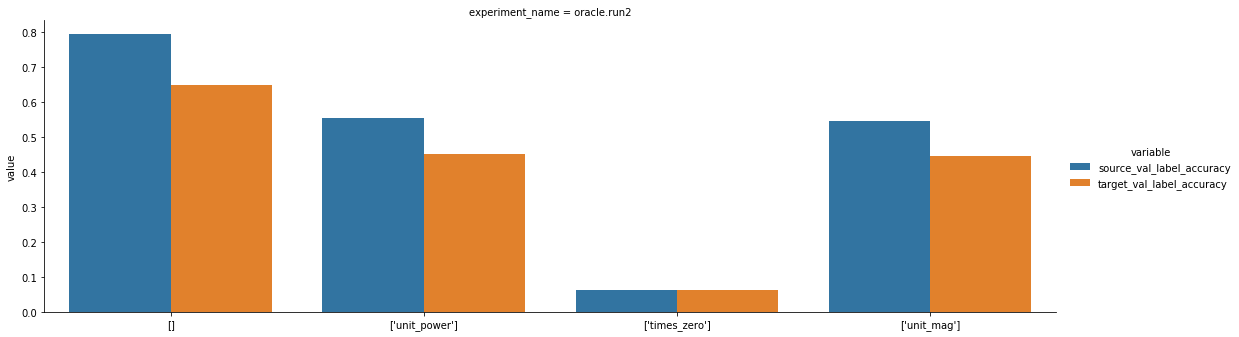

In [24]:
fg = sb.catplot(x='x_transforms_source', col="experiment_name", y='value', hue='variable', 
                        data=m, kind='bar', height=5, aspect=3)
fg.set_xlabels('')